In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [3]:
columns = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age',
    'Outcome'
]
df.columns = columns
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
x = df.drop(columns=['Outcome'])
y = df['Outcome']

x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30


In [5]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Outcome, dtype: int64

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [7]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [8]:
y_pred = model.predict(x_test)

In [9]:
acc = metrics.accuracy_score(y_test,y_pred)
clf = metrics.classification_report(y_test,y_pred)
conf_mat = metrics.confusion_matrix(y_test,y_pred)

print(acc)
print(clf)
print(conf_mat)

0.7532467532467533
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        97
           1       0.71      0.56      0.63        57

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154

[[84 13]
 [25 32]]


<AxesSubplot:>

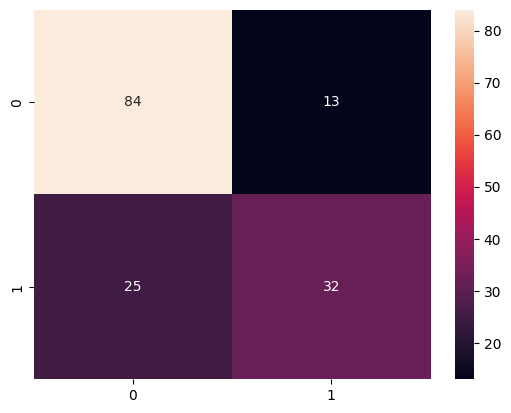

In [10]:
sns.heatmap(conf_mat,annot=True)

In [11]:
y_prob = model.predict_proba(x_test)[:,-1]
fpr,tpr,threshold = metrics.roc_curve(y_test,y_prob)
rocauc = metrics.auc(fpr,tpr)

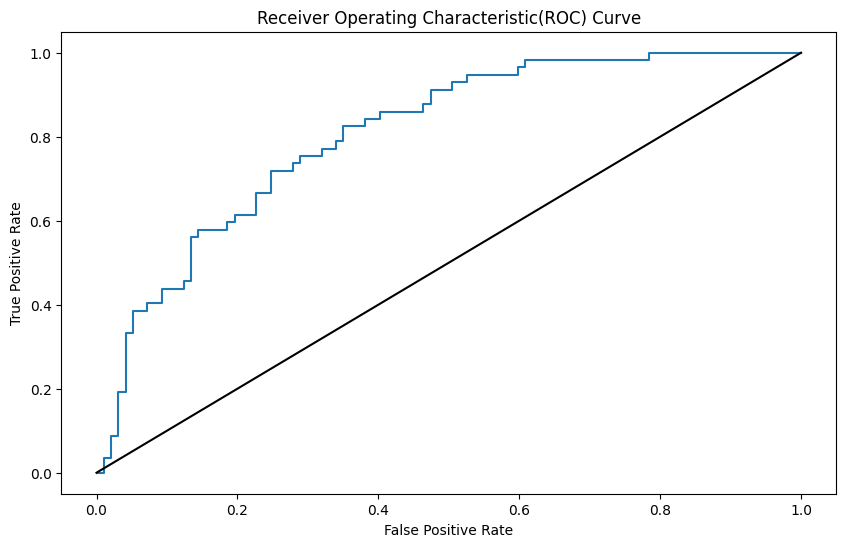

In [12]:
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="data"+str(rocauc))
plt.plot([0,1],[0,1],color="black")
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()